# Exploring Nairobi Neighbourhoods

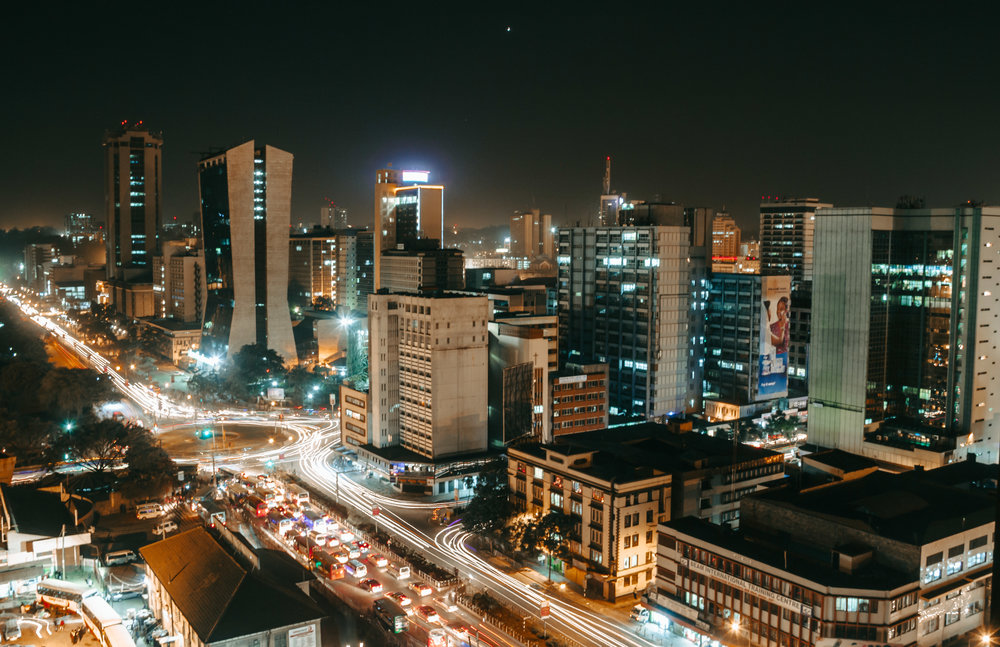

 Image courtesy of  [The African Perspective](https://www.tapmagonline.com/tap/nairobi-night-life)

In [ ]:
#pip install tabula-py

In [ ]:
#pip install geopy

In [1]:
#pip install folium

In [ ]:
#pip install tabulate

In [74]:
#!pip install -U scikit-learn

In [73]:
import tabula
from tabula import read_pdf
from tabulate import tabulate
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df= tabula.read_pdf("https://hassconsult.co.ke/real-estate/images/HassLandIndexQ12021.pdf", pages=3, multiple_tables=True)
Suburbs=pd.DataFrame(df[0])
Satelites=pd.DataFrame(df[1])

Got stderr: Jan 10, 2022 6:10:16 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile
Jan 10, 2022 6:10:21 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile



In [5]:
Suburbs.columns=['NairobiSuburbsLandIndex', 'Quarter%Change', 'Annual%Change', '10YearChangeFromApr2011', 
                 'AverageValuePerAcre(KShs)', '25Percentile', '75Percentile']
Suburbs=Suburbs.drop(0).reset_index(drop=True)
Satelites=Satelites.drop(0).reset_index(drop=True)
Satelites.columns=['NairobiSatelitesLandIndex', 'Annual%Change', '10YearChangeFromApr2011', 
                 'AverageValuePerAcre(KShs)', '25Percentile', '75Percentile']
Satelites['NairobiSatelitesLandIndex']=['Athi River','Juja','Kiambu','Kiserian','Kitengela','Limuru','Mlolongo',
    'Ngong','Ongata Rongai','Ruaka','Ruiru','Syokima','Thika','Tigon']                
Satelites['Quarter%Change']=['4.7 %','2.6 %','-2.0 %','4.6 %','-1.3 %','2.4 %','4.1 %','6.1 %','2.9 %','0.02 %','0.1 %','1.4 %', '1.7 %','3.3 %']

Satelites=Satelites[['NairobiSatelitesLandIndex','Quarter%Change','Annual%Change', '10YearChangeFromApr2011','AverageValuePerAcre(KShs)', 
 '25Percentile', '75Percentile']]
Satelites.iloc[[11],[0]] = 'Syokimau'
Satelites.iloc[[13],[0]] = 'Tigoni'
Suburbs.insert(0, 'Country', 'KENYA')
Satelites.insert(0, 'Country', 'KENYA')

In [6]:
Suburbs['Query']=Suburbs['NairobiSuburbsLandIndex']+","+Suburbs['Country']
Satelites['Query']=Satelites['NairobiSatelitesLandIndex']+","+Satelites['Country']

In [7]:
Suburbs['Area_Latitude']=""
Suburbs['Area_Longitude']=""
geolocator=Nominatim(user_agent="Nairobi_Areas")
for i in Suburbs.index:
    try:
        location=geolocator.geocode(Suburbs['Query'][i])
        Suburbs.loc[i,'Area_Latitude'] = location.latitude
        Suburbs.loc[i,'Area_Longitude'] = location.longitude
    except:
        Suburbs.loc[i,'Area_Latitude'] = ""
        Suburbs.loc[i,'Area_Longitude'] = ""
Suburbs  

,Country,NairobiSuburbsLandIndex,Quarter%Change,Annual%Change,10YearChangeFromApr2011,AverageValuePerAcre(KShs),25Percentile,75Percentile,Query,Area_Latitude,Area_Longitude
0,KENYA,Donholm,0.9 %,3.7 %,3.25 FOLD,"71,500,000","70,000,000","80,000,000","Donholm,KENYA",-1.291276,36.900927
1,KENYA,Gigiri,1.1 %,0.5 %,2.94 FOLD,"232,000,000","160,000,000","320,000,000","Gigiri,KENYA",-1.232503,36.807295
2,KENYA,Karen,0.9 %,0.7 %,3.03 FOLD,"62,800,000","55,000,000","70,000,000","Karen,KENYA",-1.328375,36.704968
3,KENYA,Kileleshwa,-0.6 %,-2.8 %,2.71 FOLD,"299,700,000","256,000,000","320,000,000","Kileleshwa,KENYA",-1.272327,36.799688
4,KENYA,Kilimani,0.3 %,-1.2%,2.99 FOLD,"415,200,000","380,000,000","479,600,000","Kilimani,KENYA",-1.287442,36.784523
5,KENYA,Kitisuru,0.01 %,0.4 %,2.44 FOLD,"89,900,000","70,000,000","109,300,000","Kitisuru,KENYA",-1.239554,36.783965
6,KENYA,Langata,1.2 %,0.1 %,2.87 FOLD,"64,500,000","50,000,000","70,000,000","Langata,KENYA",-1.332894,36.781666
7,KENYA,Lavington,0.8 %,-0.1 %,2.58 FOLD,"231,300,000","186,700,000","260,100,000","Lavington,KENYA",-1.269584,36.773716
8,KENYA,Loresho,-0.2 %,-3.5 %,3.73 FOLD,"87,800,000","73,000,000","100,000,000","Loresho,KENYA",-1.260803,36.74527
9,KENYA,Muthaiga,0.3 %,1.8 %,2.23 FOLD,"185,700,000","157,400,000","211,600,000","Muthaiga,KENYA",-1.253091,36.830104


In [116]:
Satelites['Area_Latitude']=""
Satelites['Area_Longitude']=""
geolocator=Nominatim(user_agent="Nairobi_Areas_Satelites")
for i in Satelites.index:
    try:
        location=geolocator.geocode(Satelites['Query'][i])
        Satelites.loc[i,'Area_Latitude'] = location.latitude
        Satelites.loc[i,'Area_Longitude'] = location.longitude
    except:
        Satelites.loc[i,'Area_Latitude'] = ""
        Satelites.loc[i,'Area_Longitude'] = ""
Satelites 

,Country,NairobiSatelitesLandIndex,Quarter%Change,Annual%Change,10YearChangeFromApr2011,AverageValuePerAcre(KShs),25Percentile,75Percentile,Query,Area_Latitude,Area_Longitude
0,KENYA,Athi River,4.7 %,5.9 %,3.50 FOLD,"14,500,000","6,800,000","20,000,000","Athi River,KENYA",-1.448115,36.971587
1,KENYA,Juja,2.6 %,2.6 %,4.62 FOLD,"14,900,000","6,000,000","20,800,000","Juja,KENYA",-1.101523,37.015876
2,KENYA,Kiambu,-2.0 %,-12.6 %,3.08 FOLD,"37,800,000","20,000,000","48,000,000","Kiambu,KENYA",-1.032077,36.815687
3,KENYA,Kiserian,4.6 %,6.8 %,2.64 FOLD,"8,000,000","4,000,000","10,000,000","Kiserian,KENYA",-1.430349,36.686756
4,KENYA,Kitengela,-1.3 %,-0.6 %,3.66 FOLD,"12,400,000","6,400,000","16,000,000","Kitengela,KENYA",-1.474564,36.95907
5,KENYA,Limuru,2.4 %,-2.1 %,3.05 FOLD,"23,300,000","12,000,000","35,000,000","Limuru,KENYA",-1.115865,36.63931
6,KENYA,Mlolongo,4.1 %,8.0 %,2.10 FOLD,"29,800,000","17,300,000","40,000,000","Mlolongo,KENYA",-1.394651,36.943359
7,KENYA,Ngong,6.1 %,16.0%,3.30 FOLD,"25,100,000","14,800,000","36,400,000","Ngong,KENYA",-1.3666,36.65
8,KENYA,Ongata Rongai,2.9 %,11.9 %,2.99 FOLD,"24,500,000","12,000,000","31,200,000","Ongata Rongai,KENYA",-1.395968,36.752011
9,KENYA,Ruaka,0.02 %,-0.2 %,3.00 FOLD,"90,200,000","54,000,000","136,000,000","Ruaka,KENYA",-1.205646,36.784457


In [117]:
latitude = -1.272327
longitude = 36.799688
map_kileleshwa = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for NairobiSuburbs, lat, lng in zip(Suburbs['NairobiSuburbsLandIndex'],Suburbs['Area_Latitude'], Suburbs['Area_Longitude']):
    label = '{}'.format(NairobiSuburbs)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 6,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 1,
    parse_html=False).add_to(map_kileleshwa)
    
for NairobiSatelites, lat, lng in zip(Satelites['NairobiSatelitesLandIndex'], Satelites['Area_Latitude'], Satelites['Area_Longitude']):
    label = '{}'.format(NairobiSatelites)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 6,
    popup = label,
    color = 'red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1,
    parse_html=False).add_to(map_kileleshwa)    
map_kileleshwa

# Using Foursquare

In [10]:
#CLIENT_ID = 'WEZVSUCWQRO3IB4IGR0CUUM35EYKLHWY2MHIYVRQYP30HHUA' 
#CLIENT_SECRET = 'RNLCTDBWRTBTHHVSZUTPOUEZM5UDLCUQFKYZCIMZS0OLLLWY'

In [118]:
CLIENT_ID = 'LVNSPMLTBBDPN2INEYVDDVFWLONMFATTHN1UXOKODIXDTMZA' 
CLIENT_SECRET = 'UU3FWAT2QOHGJHGYAGR54F5GFB4NJZFNDITCJZUTFCNW2OYI' 
VERSION = 20220901

In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius = 1000):
    radius = 1000
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION,
            lat, 
            lng,         
            radius, 
            LIMIT)
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
                
    return (nearby_venues)   

In [130]:
Suburb_Venues= getNearbyVenues(names = Suburbs['NairobiSuburbsLandIndex'],
                              latitudes = Suburbs['Area_Latitude'],
                            longitudes = Suburbs['Area_Longitude'])
Suburb_Venues

Donholm
Gigiri
Karen
Kileleshwa
Kilimani
Kitisuru
Langata
Lavington
Loresho
Muthaiga
Nyari
Parklands
Ridgeways
Riverside
Runda
Spring Valley
Upperhill
Westlands


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Donholm,-1.291276,36.900927,Pizza Inn GreenSpan,-1.289489,36.901064,Pizza Place
1,Donholm,-1.291276,36.900927,Greenspan Mall,-1.289542,36.900947,Shopping Mall
2,Donholm,-1.291276,36.900927,Bubbles Lounge,-1.289181,36.901441,Nightclub
3,Donholm,-1.291276,36.900927,Nakumatt Shujaa Mall,-1.294132,36.903631,Shopping Mall
4,Donholm,-1.291276,36.900927,Harry's Tavern,-1.282812,36.902170,Nightlife Spot
...,...,...,...,...,...,...,...
510,Westlands,-1.264726,36.802010,westlands stage,-1.263099,36.800534,Bus Station
511,Westlands,-1.264726,36.802010,Alcohol Section ( Uchumi Sarit),-1.261956,36.802438,Liquor Store
512,Westlands,-1.264726,36.802010,Black Diamond,-1.264155,36.805596,Nightclub
513,Westlands,-1.264726,36.802010,Anghiti Indian Restaurant,-1.266690,36.799530,Indian Restaurant


In [131]:
Satelites_Venues= getNearbyVenues(names = Satelites['NairobiSatelitesLandIndex'],
                              latitudes = Satelites['Area_Latitude'],
                            longitudes = Satelites['Area_Longitude'])
Satelites_Venues

Athi River
Juja
Kiambu
Kiserian
Kitengela
Limuru
Mlolongo
Ngong
Ongata Rongai
Ruaka
Ruiru
Syokimau
Thika
Tigoni


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Athi River,-1.448115,36.971587,Woodstock Athi-River,-1.455103,36.974882,Lounge
1,Athi River,-1.448115,36.971587,Tuskys Supermarket,-1.447405,36.972419,Department Store
2,Athi River,-1.448115,36.971587,Guest bar and restaurant,-1.452388,36.971897,Bar
3,Athi River,-1.448115,36.971587,Vanillas Club,-1.451572,36.968816,Hotel Bar
4,Juja,-1.101523,37.015876,Senate Hotel,-1.105867,37.015319,Bar
...,...,...,...,...,...,...,...
89,Thika,-1.036648,37.077523,Pizza Inn,-1.039240,37.072143,Pizza Place
90,Thika,-1.036648,37.077523,Royal Grill,-1.038541,37.071814,BBQ Joint
91,Thika,-1.036648,37.077523,Coconut Grill,-1.040644,37.071793,Fast Food Restaurant
92,Tigoni,-1.129690,36.684584,Brown's Cheese Farm and Factory,-1.128231,36.682026,Farm


# Restaurants

In [246]:
Suburb_Venues_restaurants = pd.DataFrame(Suburb_Venues[Suburb_Venues['Venue_Category'].str.contains('Restaurant')].reset_index(drop=True))
Suburb_Venues_restaurants.index = np.arange(1, len(Suburb_Venues_restaurants)+1)
Satelites_Venues_restaurants = pd.DataFrame(Satelites_Venues[Satelites_Venues['Venue_Category'].str.contains('Restaurant')].reset_index(drop=True))
Satelites_Venues_restaurants.index = np.arange(1, len(Satelites_Venues_restaurants)+1)

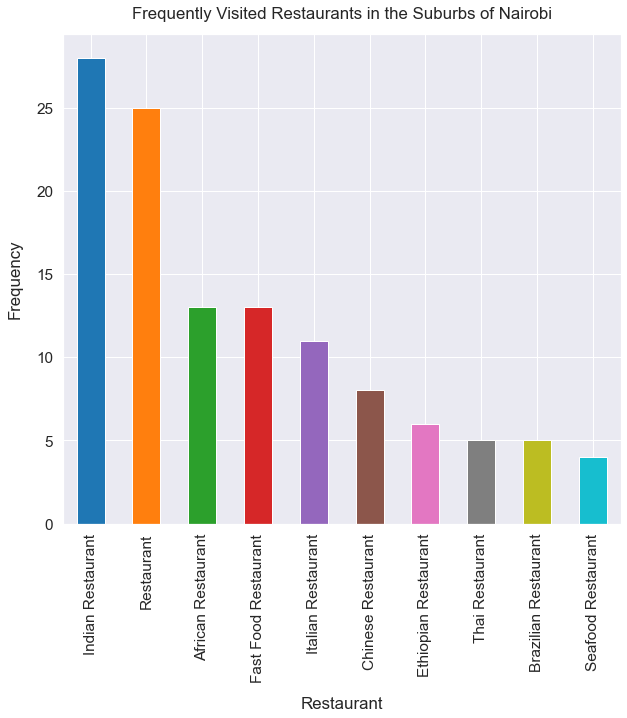

In [194]:
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Suburb_Venues_restaurants['Venue_Category'].value_counts().head(10).plot(kind='bar', figsize=(10, 9), rot=0, color=colors)
plt.xlabel("Restaurant", labelpad=14)
plt.xticks(rotation=90)
plt.ylabel("Frequency", labelpad=14)
plt.title("Frequently Visited Restaurants in the Suburbs of Nairobi", y=1.02);


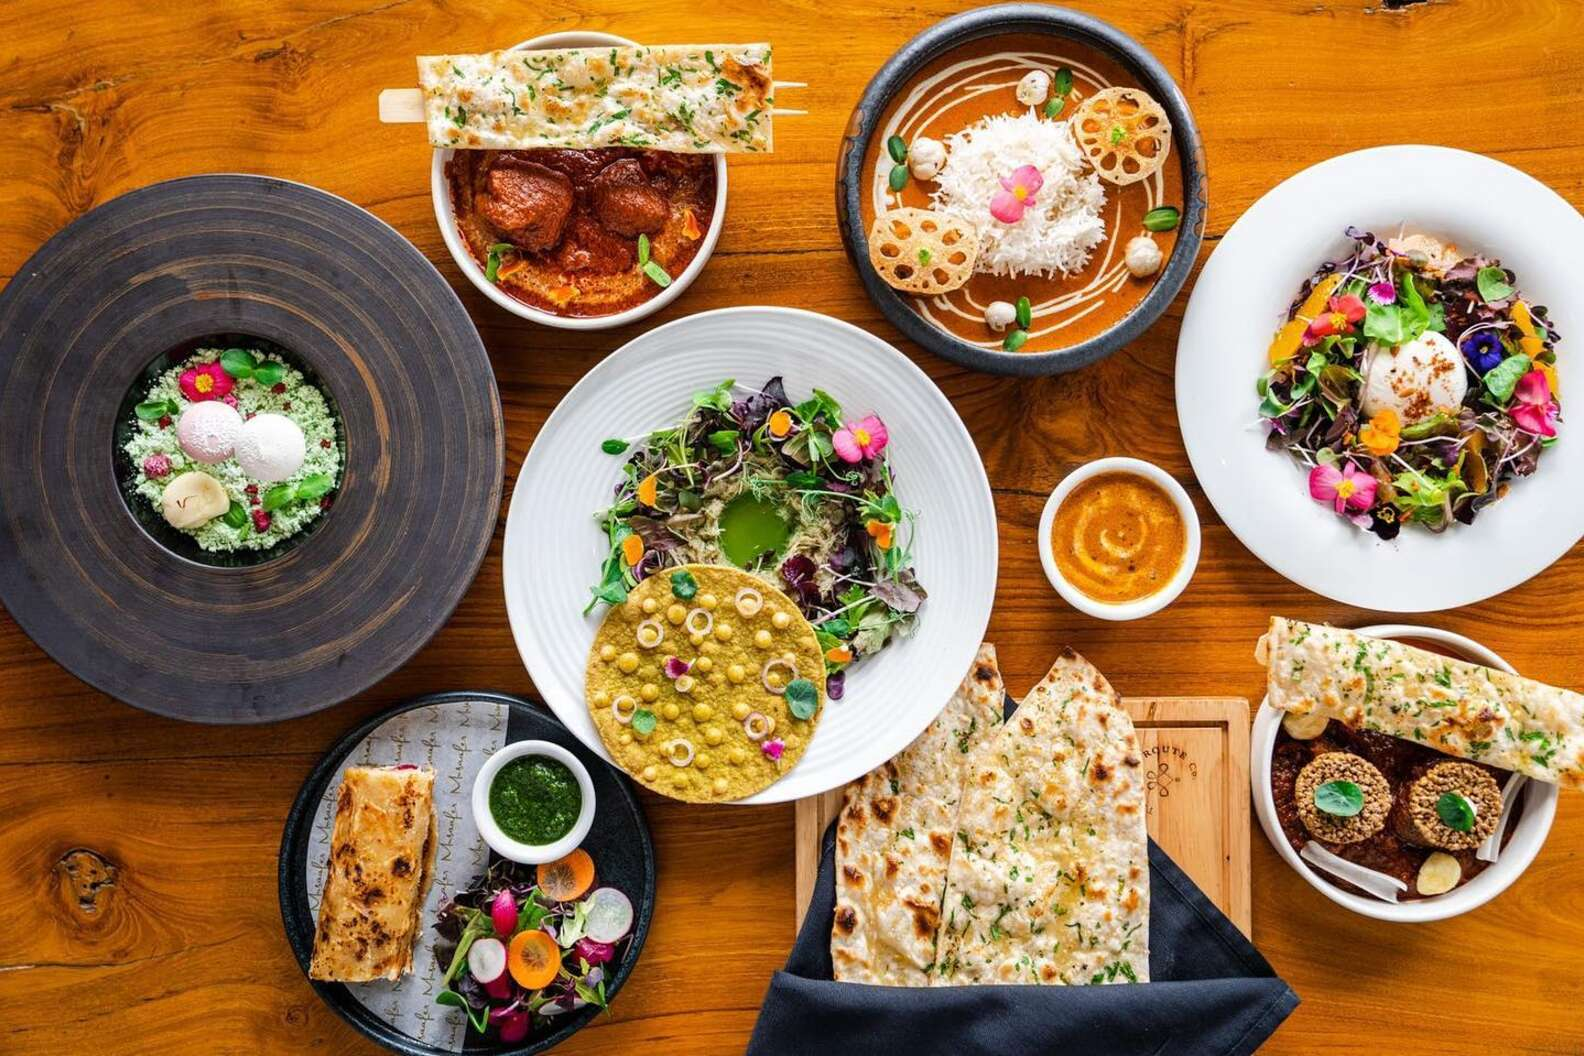

 Image courtesy of   [Thrillist](https://www.thrillist.com/eat/houston/best-indian-restaurants-houston)

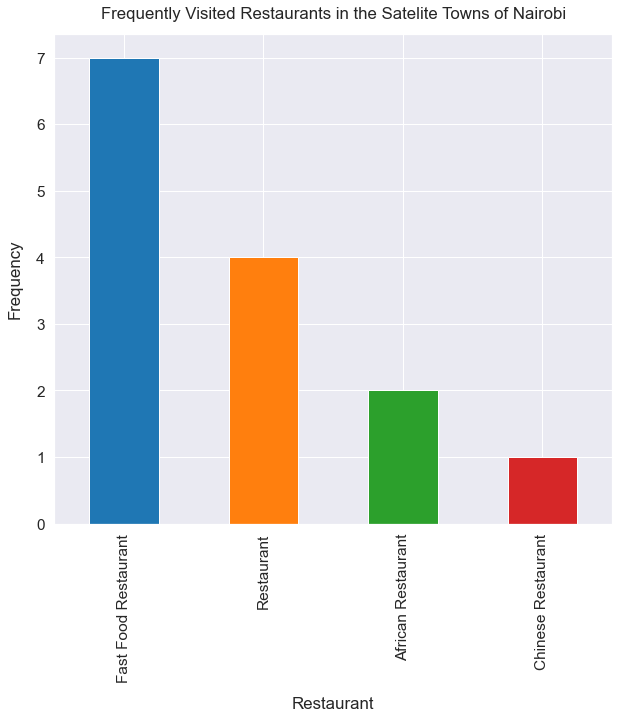

In [136]:
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Satelites_Venues_restaurants['Venue_Category'].value_counts().head(10).plot(kind='bar', figsize=(10, 9), rot=0, color=colors)
plt.xlabel("Restaurant", labelpad=14)
plt.xticks(rotation=90)
plt.ylabel("Frequency", labelpad=14)
plt.title("Frequently Visited Restaurants in the Satelite Towns of Nairobi", y=1.02);

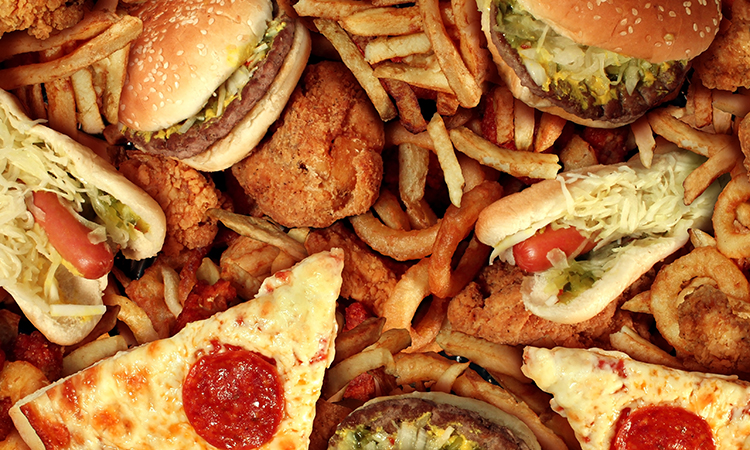

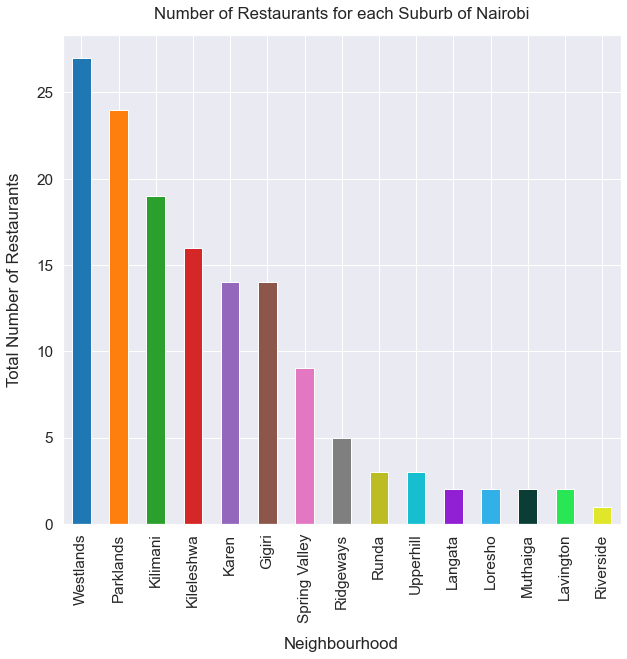

In [125]:
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
          '#17becf','#911FD4','#32B1E8','#093D36', '#29E655','#E0E629','#E66829']
Suburb_Venues_restaurants['Neighborhood'].value_counts().plot(kind='bar', figsize=(10, 9), rot=0, color=colors)
plt.xlabel("Neighbourhood", labelpad=14)
plt.xticks(rotation=90)
plt.ylabel("Total Number of Restaurants", labelpad=14)
plt.title("Number of Restaurants for each Suburb of Nairobi", y=1.02);

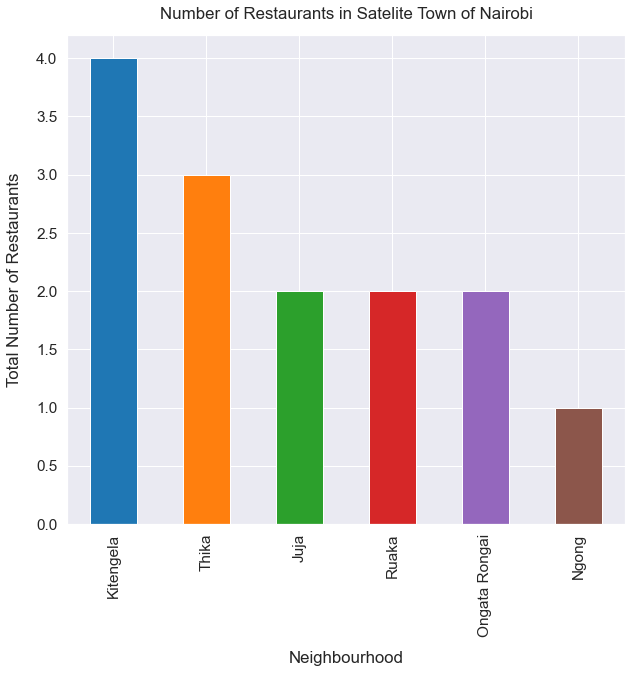

In [126]:
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Satelites_Venues_restaurants['Neighborhood'].value_counts().plot(kind='bar', figsize=(10, 9), rot=0, color=colors)
plt.xlabel("Neighbourhood", labelpad=14)
plt.xticks(rotation=90)
plt.ylabel("Total Number of Restaurants", labelpad=14)
plt.title("Number of Restaurants in Satelite Town of Nairobi", y=1.02);

In [247]:
#latitude = -1.272327
#longitude = 36.799688
neighborhood_locations = Suburb_Venues_restaurants[["Neighborhood_Latitude", "Neighborhood_Longitude", "Neighborhood"]]
mapsubres = folium.Map(location=[Suburb_Venues_restaurants.Neighborhood_Latitude.mean(), Suburb_Venues_restaurants.Neighborhood_Longitude.mean()], control_scale=True, zoom_start=12)
# add markers to map
for Suburb_Venues_restaurants, lat, lng in zip(Suburb_Venues_restaurants['Venue'],Suburb_Venues_restaurants['Venue_Latitude'], Suburb_Venues_restaurants['Venue_Longitude']):
    label = '{}'.format(Suburb_Venues_restaurants)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 4,
    popup = label,
    color = 'red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1,
    parse_html=False).add_to(mapsubres)  
    
for NairobiSuburbs, lat, lng in zip(Suburbs['NairobiSuburbsLandIndex'],Suburbs['Area_Latitude'], Suburbs['Area_Longitude']):
    label = '{}'.format(NairobiSuburbs)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
    [lat, lng],
    popup = Suburbs['NairobiSuburbsLandIndex']).add_to(mapsubres)        
mapsubres

## Nairobi CBD

In [244]:
mapsubres.save("RestauramtsSuburbs.html")